
Freshwater is one of our most vital and scarce natural resources, making up just 3% of the earth’s total water volume. It touches nearly every aspect of our daily lives, from drinking, swimming, and bathing to generating food, electricity, and the products we use every day. Access to a safe and sanitary water supply is essential not only to human life, but also to the survival of surrounding ecosystems that are experiencing the effects of droughts, pollution, and rising temperatures.


The Dataset is water related datasets.

In [1]:
!wget 'https://s3-ap-southeast-1.amazonaws.com/he-public-data/datasetab75fb3.zip'

--2023-01-05 05:06:47--  https://s3-ap-southeast-1.amazonaws.com/he-public-data/datasetab75fb3.zip
Resolving s3-ap-southeast-1.amazonaws.com (s3-ap-southeast-1.amazonaws.com)... 52.219.40.206
Connecting to s3-ap-southeast-1.amazonaws.com (s3-ap-southeast-1.amazonaws.com)|52.219.40.206|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 987001656 (941M) [binary/octet-stream]
Saving to: ‘datasetab75fb3.zip’

datasetab75fb3.zip  100%[===================>] 941.28M  16.8MB/s    in 59s     

2023-01-05 05:07:47 (15.9 MB/s) - ‘datasetab75fb3.zip’ saved [987001656/987001656]



In [2]:
!unzip '/content/datasetab75fb3.zip'

Archive:  /content/datasetab75fb3.zip
  inflating: dataset.csv             


In [3]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
data =pd.read_csv('/content/dataset.csv')

In [4]:
data.head()

,Index,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,...,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Month,Day,Time of Day,Target
0,0,8.332988,0.000083,8.605777,122.799772,3.713298e-52,3.434827,Colorless,0.022683,0.607283,...,3.708178,2.269945e-15,332.118789,NaN,NaN,43.493324,January,29.0,4.0,0
1,1,6.917863,0.000081,3.734167,227.029851,7.849262e-94,1.245317,Faint Yellow,0.019007,0.622874,...,3.292038,8.024076e-07,284.641984,Lake,15.348981,71.220586,November,26.0,16.0,0
2,2,5.443762,0.020106,3.816994,230.995630,5.286616e-76,0.528280,Light Yellow,0.319956,0.423423,...,3.560224,7.007989e-02,570.054094,River,11.643467,44.891330,January,31.0,8.0,0
3,3,7.955339,0.143988,8.224944,178.129940,3.997118e-176,4.027879,Near Colorless,0.166319,0.208454,...,3.516907,2.468295e-02,100.043838,Ground,10.092392,60.843233,April,1.0,21.0,0
4,4,8.091909,0.002167,9.925788,186.540872,4.171069e-132,3.807511,Light Yellow,0.004867,0.222912,...,3.177849,3.296139e-03,168.075545,Spring,15.249416,69.336671,June,29.0,7.0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5956842 entries, 0 to 5956841
Data columns (total 24 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Index                   int64  
 1   pH                      float64
 2   Iron                    float64
 3   Nitrate                 float64
 4   Chloride                float64
 5   Lead                    float64
 6   Zinc                    float64
 7   Color                   object 
 8   Turbidity               float64
 9   Fluoride                float64
 10  Copper                  float64
 11  Odor                    float64
 12  Sulfate                 float64
 13  Conductivity            float64
 14  Chlorine                float64
 15  Manganese               float64
 16  Total Dissolved Solids  float64
 17  Source                  object 
 18  Water Temperature       float64
 19  Air Temperature         float64
 20  Month                   object 
 21  Day                     float64

We have to check the null value count in our dataset beacause the algorithm does not predicted well,so we have to check if dataset have a null values or not.here we can use the pandas isnull method. 

In [6]:
data.isnull().sum()

Index                          0
pH                        116054
Iron                       39753
Nitrate                   105725
Chloride                  175531
Lead                       26909
Zinc                      156126
Color                       5739
Turbidity                  49815
Fluoride                  189156
Copper                    199402
Odor                      178891
Sulfate                   197418
Conductivity              163861
Chlorine                   57825
Manganese                 109583
Total Dissolved Solids      1670
Source                     88262
Water Temperature         168233
Air Temperature            29728
Month                      95668
Day                        99603
Time of Day               114519
Target                         0
dtype: int64

In [7]:
#Before modifying for original dataset we get the copy of it.
resourse = data.copy()

In [8]:
#Drop some data for more accuracy
drop_columns = ["Month","Day","Time of Day"]
data=data.drop(drop_columns,axis=1)

In [9]:
data_labels =data['Target']
data=data.drop('Target',axis=1)

We can separate the columns(categorical,numerical) using the  scikit learn make_column_selector method.

In [10]:
from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(data)
categorical_columns = categorical_columns_selector(data)

In [11]:
cat_data=data[categorical_columns].fillna('bfill')
num_data=data[numerical_columns].fillna(0.0)

In [12]:
prepared_data=num_data.join(cat_data)

In [13]:
prepared_data.shape

(5956842, 20)

In [14]:
prepared_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5956842 entries, 0 to 5956841
Data columns (total 20 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Index                   int64  
 1   pH                      float64
 2   Iron                    float64
 3   Nitrate                 float64
 4   Chloride                float64
 5   Lead                    float64
 6   Zinc                    float64
 7   Turbidity               float64
 8   Fluoride                float64
 9   Copper                  float64
 10  Odor                    float64
 11  Sulfate                 float64
 12  Conductivity            float64
 13  Chlorine                float64
 14  Manganese               float64
 15  Total Dissolved Solids  float64
 16  Water Temperature       float64
 17  Air Temperature         float64
 18  Color                   object 
 19  Source                  object 
dtypes: float64(17), int64(1), object(2)
memory usage: 908.9+ MB


In [15]:
prepared_data.isnull().sum()

Index                     0
pH                        0
Iron                      0
Nitrate                   0
Chloride                  0
Lead                      0
Zinc                      0
Turbidity                 0
Fluoride                  0
Copper                    0
Odor                      0
Sulfate                   0
Conductivity              0
Chlorine                  0
Manganese                 0
Total Dissolved Solids    0
Water Temperature         0
Air Temperature           0
Color                     0
Source                    0
dtype: int64

In [16]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()

In [17]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    ('standard_scaler', numerical_preprocessor, numerical_columns)])

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

model = make_pipeline(preprocessor, LogisticRegression(max_iter=500))
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Color', 'Source']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['Index', 'pH', 'Iron',
                                                   'Nitrate', 'Chloride',
                                                   'Lead', 'Zinc', 'Turbidity',
                                                   'Fluoride', 'Copper', 'Odor',
                                                   'Sulfate', 'Conductivity',
                                                   'Chlorine', 'Manganese',
                                                   'Total Dissolved Solids',
                                                   'Wa

In [19]:
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(
    prepared_data, data_labels, random_state=2)

In [20]:
linear_ = model.fit(data_train, target_train)

In [21]:
predicted_data = model.predict(data_test)

In [22]:
from sklearn.metrics import accuracy_score,confusion_matrix

score = accuracy_score(target_test,predicted_data)
score

0.7895926097779293

The linear model accuracy score is a 78%.we can export much more accuracy percentage so we can go for another model



In [23]:
from sklearn.metrics import classification_report

print(classification_report(target_test,predicted_data))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86   1037475
           1       0.72      0.50      0.59    451736

    accuracy                           0.79   1489211
   macro avg       0.76      0.71      0.73   1489211
weighted avg       0.78      0.79      0.78   1489211



In [24]:
con_mtrx = confusion_matrix(target_test,predicted_data)

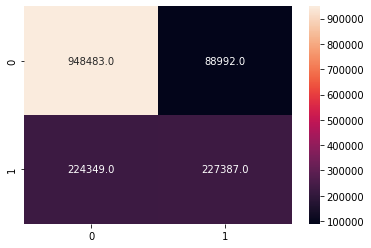

In [25]:
import seaborn as sns
sns.heatmap(con_mtrx, annot=True,fmt=".1f")

In [26]:
predicted_data

array([0, 0, 0, ..., 1, 0, 0])

In [27]:
from sklearn.linear_model import SGDClassifier
sgd_model = make_pipeline(preprocessor, SGDClassifier(random_state=2))

In [28]:
sgd_ = sgd_model.fit(data_train,target_train)

In [29]:
sgd_predictvalue= sgd_model.predict(data_test)

In [30]:
score = accuracy_score(target_test,sgd_predictvalue)
score

0.7927009671564338

In [31]:
print(classification_report(target_test,sgd_predictvalue))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86   1037475
           1       0.72      0.52      0.61    451736

    accuracy                           0.79   1489211
   macro avg       0.77      0.72      0.73   1489211
weighted avg       0.78      0.79      0.78   1489211



In [32]:
sgd_confmtx= confusion_matrix(target_test,sgd_predictvalue)

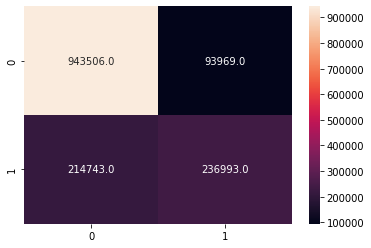

In [33]:
sns.heatmap(sgd_confmtx, annot=True,fmt=".1f")

Comparing the both model SGD classifier gives more accuracy score we can use this model to predict the value.



In [34]:
sample_one = data_train[:1]
sample_true = target_train[:1]


In [35]:
print(sample_one)

           Index        pH          Iron   Nitrate    Chloride          Lead  \
2577021  2577021  7.651402  5.932075e-14  4.357454  195.438698  1.516015e-37   

             Zinc  Turbidity  Fluoride    Copper      Odor     Sulfate  \
2577021  0.447941   0.062052  0.332869  0.130803  3.188509  179.873522   

         Conductivity  Chlorine  Manganese  Total Dissolved Solids  \
2577021    295.788944  2.778776   0.027591              341.184511   

         Water Temperature  Air Temperature         Color   Source  
2577021           8.975598        72.046123  Faint Yellow  Aquifer  


In [36]:
print(sample_true)

2577021    0
Name: Target, dtype: int64


In [37]:
#Now we have to apply our finialized algorithm

predicted_one = sgd_model.predict(sample_one)

In [38]:
predicted_one

array([0])

The model almost working perfectly,we can cross validate with one example.


#Future works 
  Create a UI and Get the values from user and then predict the values.

  Based upon the water values we can print for the **water is able to drink or not** 